# Local de Trabalho

## Pacotes

In [1]:
#Importa os pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use('seaborn-darkgrid')

#### Dicionário de Variáveis utilizadas

|Chave|Descrição|Função|
|-----|-----|-----|
|**Identificação**|
|Ano| Ano de referência|Controle|
|Trimestre| Trimestre de referência|Controle|
|UF| Estado|Controle|
|Capital| Capital da UF|Controle|
|UPA| Unidade Primária de Amostragem (UF(2) + número squencial(6) + DV(1))|Controle|
|V1008| Número do Domicílio|Controle|
|V1014| Painel - Grupo de Controle|Controle|
|V1016| Número de entrevista (1 a 5)|Controle|
|V2003| Número de ordem|Controle|
|**Características**|
|V2007| Sexo|Característica|
|V2008| Dia Nascimento|Característica|
|V20081| Mês nascimento|Característica|
|V20082| Ano nascimento|Característica|
|V2010| Raça|Característica|
|**Variáveis exploradas**|
| VD4002 | Condição de ocupação na semana de referência para pessoas de 14 anos ou mais de idade | Descrição |
|**Auxiliares**|
|V1028| Peso do domicílio e das pessoas sem calibração|Expansão|
|V1029| Peso do domicílio e das pessoas com calibração|Expansão|
|V1033| Projeção da população por sexo e idade|Expansão|
|posest|Domínios de projeção geográficos|Expansão|

 Chave para pessoa: UPA + V1008 + V1014  + V2003 + V2007 + V2008 + V20081 + V20082

 **PARA ESTIMAÇÃO DA POPULAÇÃO, DEVE-SE USAR AS VARIÁVEIS: V1033 e posest.**



## Importação e tratamento dos microdados

### Importação dos microdados

In [ ]:
#conferir as características do  individuo com o a chave

In [4]:
#determina qual diretório usar para cada sistema operacional.
import os
if os.name == 'nt': #windows
    diretorio = 'C:\\Users\\est.matheus.brasil\\Documents\\Microdados PNAD Contínua\\feather\\'

else: #linux(ou mac)
    diretorio = '/home/matheus/Microdados PNAD/feather/'


#Leitura de todas as bases com as variáveis selecionadas e criação de variáveis dinamicamente.

colunas_selecionadas = ['Ano', 'Trimestre', 'UPA', 'UF', 'V1008', 'V1014', 'V2007', 'V2008', 'V20081', 'V20082', 'V2010', #Controle
                        'V1016', 'VD4001','VD4002', 'V4022', #Variáveis de interesse
                        'V1028', 'V1029', 'V1033', 'posest', 'posest_sxi'] #identificação

# colunas_selecionadas_sup = ['Ano', 'Trimestre', 'UPA', 'UF', 'V1008', 'V1014', 'V2007', 'V2008', 'V20081', 'V20082', 'V2010', #Controle
#                         'VD4001', 'VD4002', 'VD4003', 'VD4004A','S01021', #Variáveis de interesse
#                         'V1028', 'V1029', 'V1033', 'posest', 'posest_sxi'] #identificação
                        

for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
                print(f'lendo PNAD {ano} {tri}')
                globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)
        if 2019 < ano < 2022:
                print(f'lendo PNAD {ano} {tri}')
                globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)
        if ano == 2022 and tri < 3:
            print(f'lendo PNAD {ano} {tri}')
            globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)

lendo PNAD 2019 4
lendo PNAD 2020 1
lendo PNAD 2020 2
lendo PNAD 2020 3
lendo PNAD 2020 4
lendo PNAD 2021 1
lendo PNAD 2021 2
lendo PNAD 2021 3
lendo PNAD 2021 4
lendo PNAD 2022 1
lendo PNAD 2022 2


In [43]:
#Concatena todos os dataframes de cada ano e trimestre em uma unica tabela.
pnadc_completa = pd.concat([pnad_2019_4, pnad_2020_1, pnad_2020_2, pnad_2020_3, pnad_2020_4, pnad_2021_1, pnad_2021_2, pnad_2021_3, pnad_2021_4, pnad_2022_1, pnad_2022_2])

In [44]:
#Converte variável para criar ID
pnadc_completa['V2007'] = np.where(pnadc_completa['V2007'] == 'Homem', '0', '1')
#Converte variáveis para numéricas

#convert as coluna upa para string

pnadc_completa['UPA'] = pnadc_completa['UPA'].astype(str)
pnadc_completa['V1008'] = pnadc_completa['V1008'].astype(str)
pnadc_completa['V1014'] = pnadc_completa['V1014'].astype(str)
pnadc_completa['V2007'] = pnadc_completa['V2007'].astype(str)
pnadc_completa['V2008'] = pnadc_completa['V2008'].astype(str)
pnadc_completa['V20081'] = pnadc_completa['V20081'].astype(str)
pnadc_completa['V20082'] = pnadc_completa['V20082'].astype(str)

#Cria chave ID e novo df
pnadc_completa = pd.DataFrame({
    #Controle
    'Ano':pnadc_completa['Ano'], 
    'Trimestre':pnadc_completa['Trimestre'],
    'UF':pnadc_completa['UF'],
    'V2007':pnadc_completa['V2007'],
    #ID  
    'ID': pnadc_completa['UPA'] + 
        pnadc_completa['V1008'] + 
        pnadc_completa['V1014']+
        pnadc_completa['V2008'] +
        pnadc_completa['V20081'] +
        pnadc_completa['V20082'],
    #Exploradas
    'V1016': pnadc_completa['V1016'],
    'VD4001': pnadc_completa['VD4001'],
    'VD4002': pnadc_completa['VD4002'],
    'V4022': pnadc_completa['V4022'],
    #Expansão
    'V1028': pnadc_completa['V1028'],
    'V1029': pnadc_completa['V1029'],
    'V1033': pnadc_completa['V1033'],
    'posest': pnadc_completa['posest'],
    'posest_sxi': pnadc_completa['posest_sxi']
    })


#Reverte alteração da coluna V2007 para os rótulos anteiores
pnadc_completa['V2007'] = pnadc_completa['V2007'].apply(lambda x: 'Homem' if x == '0' else 'Mulher')
# Ordernação da série histórica por ano e trimestre.
pnadc_completa.sort_values(by=['Ano', 'Trimestre'], inplace=True)
#concatena a coluna 'Ano' e 'Trimestre' em uma única coluna.
pnadc_completa['ano_tri'] = pnadc_completa['Ano'].astype(str) + 'Q' + pnadc_completa['Trimestre'].astype(str)
#Conversão da coluna ano_tri para datetime.
pnadc_completa['ano_tri'] = pd.to_datetime(pnadc_completa['ano_tri']).dt.to_period('Q')

In [47]:
pnadc_completa['ID'].value_counts()

2600786708899999999     80
23007580714999999999    71
1600072928899999999     60
16000453214999999999    55
5100222907999999999     54
                        ..
230068384292641999       1
23006668713999999999     1
230066687139691964       1
2300666871392491967      1
530057544149322021       1
Name: ID, Length: 1631206, dtype: int64

### Análise Exploratória (Expandida)

#### Descritiva Gerais

População total estimada (2T2022)

In [25]:
pnadc_completa['ID'].value_counts()

260088883    84
230086027    81
170026574    76
120010261    63
160017505    60
             ..
260088811     1
260095033     1
260103241     1
260095367     1
530059593     1
Name: ID, Length: 920577, dtype: int64

In [5]:
pop_uf = pd.crosstab(pnadc_completa['ano_tri'], pnadc_completa['UF'], values=pnadc_completa['V1028'], aggfunc='sum')

Quantidade estimada de pessoas do sexo masculino e feminino por UF

In [7]:
populacao_uf = pd.crosstab(pnadc_completa['ano_tri'], pnadc_completa['UF'], values=pnadc_completa['V1028'], aggfunc='sum')

In [8]:
pop_sexo_uf = pd.crosstab(
                        index=pnadc_completa['ano_tri'], 
                        columns=[pnadc_completa['UF'], pnadc_completa['V2007']], 
                        values=pnadc_completa['V1028'], aggfunc='sum')

Estimativa do total de pessoas por local de trabalho em todos os trimestres da série.

In [48]:
forca_trabalho_ocupada = pnadc_completa[(pnadc_completa['VD4001'] == 'Pessoas na força de trabalho') & (pnadc_completa['VD4002'] == 'Pessoas ocupadas')]

In [56]:
forca_trabalho_ocupada.dropna(subset=['V4022'], inplace=True)

<ipython-input-56-fda85c3f6eef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forca_trabalho_ocupada.dropna(subset=['V4022'], inplace=True)


In [33]:
forca_trabalho_ocupada['V4022'].fillna('Valor ausente', inplace=True)

<ipython-input-33-1fc7b62c32d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forca_trabalho_ocupada['V4022'].fillna('Valor ausente', inplace=True)


In [49]:
local_trabalho = pd.crosstab(
                        index=forca_trabalho_ocupada['ano_tri'],
                        columns=forca_trabalho_ocupada['V4022'],
                        values=forca_trabalho_ocupada['V1028'], aggfunc='sum')

In [15]:
local_trabalho_expandido =  pd.crosstab(index=pnadc_completa['ano_tri'],
                            columns=pnadc_completa['V4022'], 
                            values=(pnadc_completa['V1029']*pnadc_completa['posest'])/pnadc_completa['V1029'], 
                            aggfunc='sum')                            


local_trabalho_expandido

V4022,"Em domicílio de empregador, patrão, sócio ou freguês",Em estabelecimento de outro négocio/empresa,"Em local designado pelo empregador, cliente ou freguês","Em outro local, especifique","Em veículo automotor (táxi, ônibus, caminhão, automóvel, embarcação, etc.)","Em via ou área pública (rua, rio, manguezal, mata pública, praça, praia etc.)","No domicílio de residência, em local exclusivo para o desempenho da atividade","No domicílio de residência, sem local exclusivo para o desempenho da atividade"
ano_tri,,,,,,,,
2019Q4,551165.0,872294.0,8314275.0,132746.0,2733870.0,1616684.0,1401940.0,1995927.0
2020Q1,429022.0,735621.0,7129620.0,110726.0,2482356.0,1420222.0,1256501.0,1780975.0
2020Q2,269039.0,565425.0,4717074.0,72425.0,1730357.0,807846.0,978294.0,1266258.0
2020Q3,274355.0,539021.0,4761211.0,85829.0,1584083.0,776977.0,1028754.0,1329210.0
2020Q4,276152.0,494578.0,4519339.0,83641.0,1516191.0,793143.0,1090419.0,1355368.0
2021Q1,261902.0,431484.0,4293998.0,74133.0,1407660.0,754611.0,1092998.0,1352015.0
2021Q2,313379.0,468991.0,4863340.0,90984.0,1566155.0,921672.0,1308249.0,1538922.0
2021Q3,416776.0,575540.0,6203848.0,127151.0,1962686.0,1192100.0,1614447.0,1919838.0
2021Q4,444946.0,620744.0,6762799.0,151675.0,2063158.0,1286129.0,1742474.0,2052621.0


Total de pessoas por local local de trabalho em cada trimestre

In [59]:
total_ocupadas = pd.DataFrame(local_trabalho.sum(axis=1)) 

In [60]:
total_ocupadas.rename(columns={0:'Total ocupadas'}, inplace=True)

In [61]:
#transformar total em inteiro    
total_ocupadas['Total ocupadas'] = total_ocupadas['Total ocupadas'].astype(int)

In [64]:
forca_trabalho_ocupada['ID'].value_counts()

16000453214999999999    33
42008214013899999999    27
4201214232999999999     25
2601084524999999999     25
2900981079999999999     25
                        ..
21001392218831963        1
250059775139311998       1
25005977513999999999     1
21003048938351990        1
5300575441492321986      1
Name: ID, Length: 776611, dtype: int64

In [70]:
forca_trabalho_ocupada[forca_trabalho_ocupada['ID']=='2900981079999999999'][['ano_tri','ID','V1016', 'VD4001','VD4002', 'V4022']]

,ano_tri,ID,V1016,VD4001,VD4002,V4022
150512,2020Q4,2900981079999999999,1,Pessoas na força de trabalho,Pessoas ocupadas,"Em domicílio de empregador, patrão, sócio ou f..."
150514,2020Q4,2900981079999999999,1,Pessoas na força de trabalho,Pessoas ocupadas,None
150515,2020Q4,2900981079999999999,1,Pessoas na força de trabalho,Pessoas ocupadas,None
150516,2020Q4,2900981079999999999,1,Pessoas na força de trabalho,Pessoas ocupadas,None
150518,2020Q4,2900981079999999999,1,Pessoas na força de trabalho,Pessoas ocupadas,None
146411,2021Q1,2900981079999999999,2,Pessoas na força de trabalho,Pessoas ocupadas,"Em domicílio de empregador, patrão, sócio ou f..."
146413,2021Q1,2900981079999999999,2,Pessoas na força de trabalho,Pessoas ocupadas,None
146414,2021Q1,2900981079999999999,2,Pessoas na força de trabalho,Pessoas ocupadas,None
146415,2021Q1,2900981079999999999,2,Pessoas na força de trabalho,Pessoas ocupadas,None
146417,2021Q1,2900981079999999999,2,Pessoas na força de trabalho,Pessoas ocupadas,None


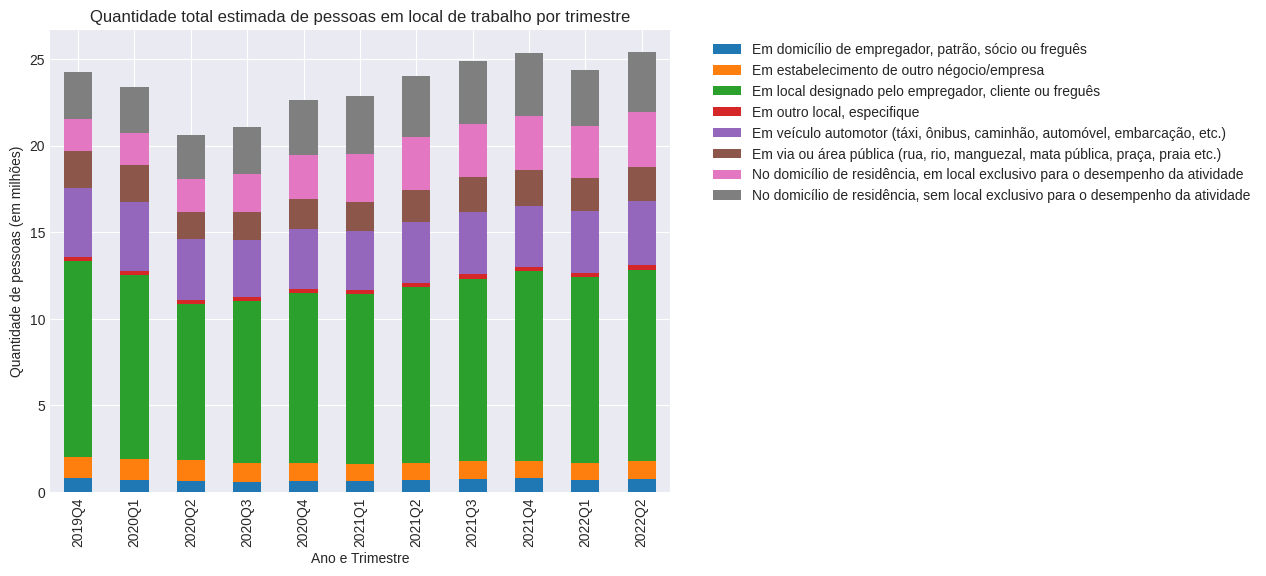

In [64]:
(local_trabalho/1000000).plot(kind='bar', stacked=True, figsize=(8, 6), title='Quantidade total estimada de pessoas em local de trabalho por trimestre')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 10})
plt.xlabel('Ano e Trimestre')
plt.ylabel('Quantidade de pessoas (em milhões)')

plt.show()

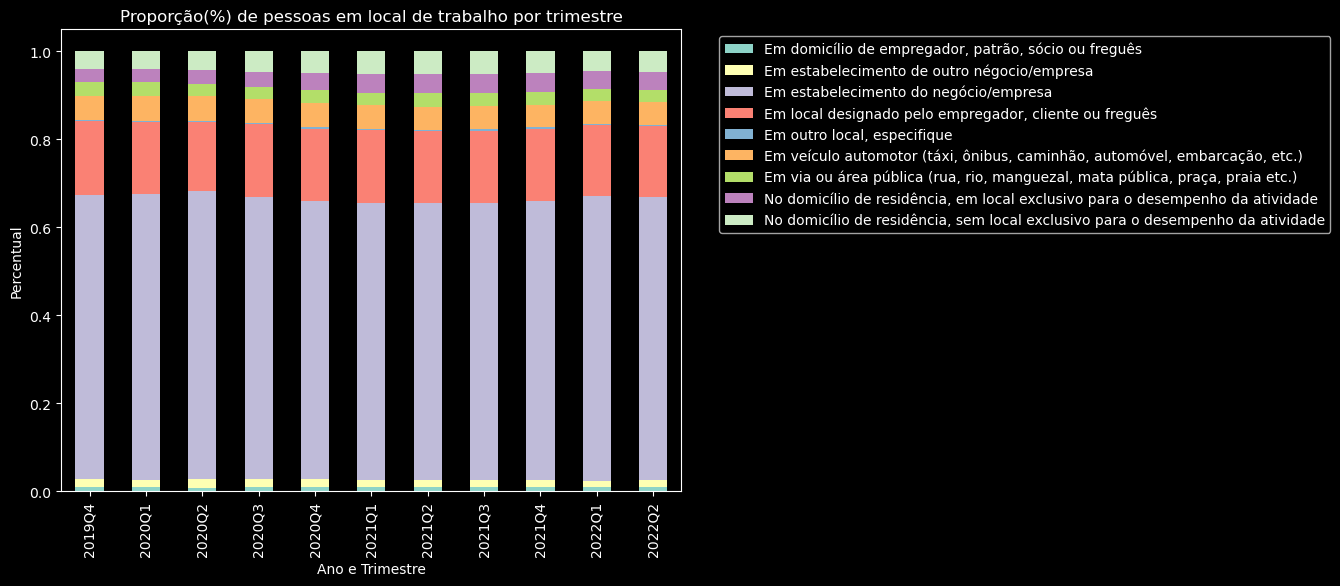

In [ ]:
pd.crosstab(index=pnadc_completa['ano_tri'],
                            columns=pnadc_completa['V4022'], 
                            values=(pnadc_completa['V1029']*pnadc_completa['posest'])/pnadc_completa['V1029'], 
                            aggfunc='sum',
                            normalize='index').plot(kind='bar', 
                                                    stacked=True, 
                                                    figsize=(8, 6), 
                                                    title='Proporção(%) de pessoas em local de trabalho por trimestre')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 10})
plt.xlabel('Ano e Trimestre')
plt.ylabel('Percentual')

plt.show()

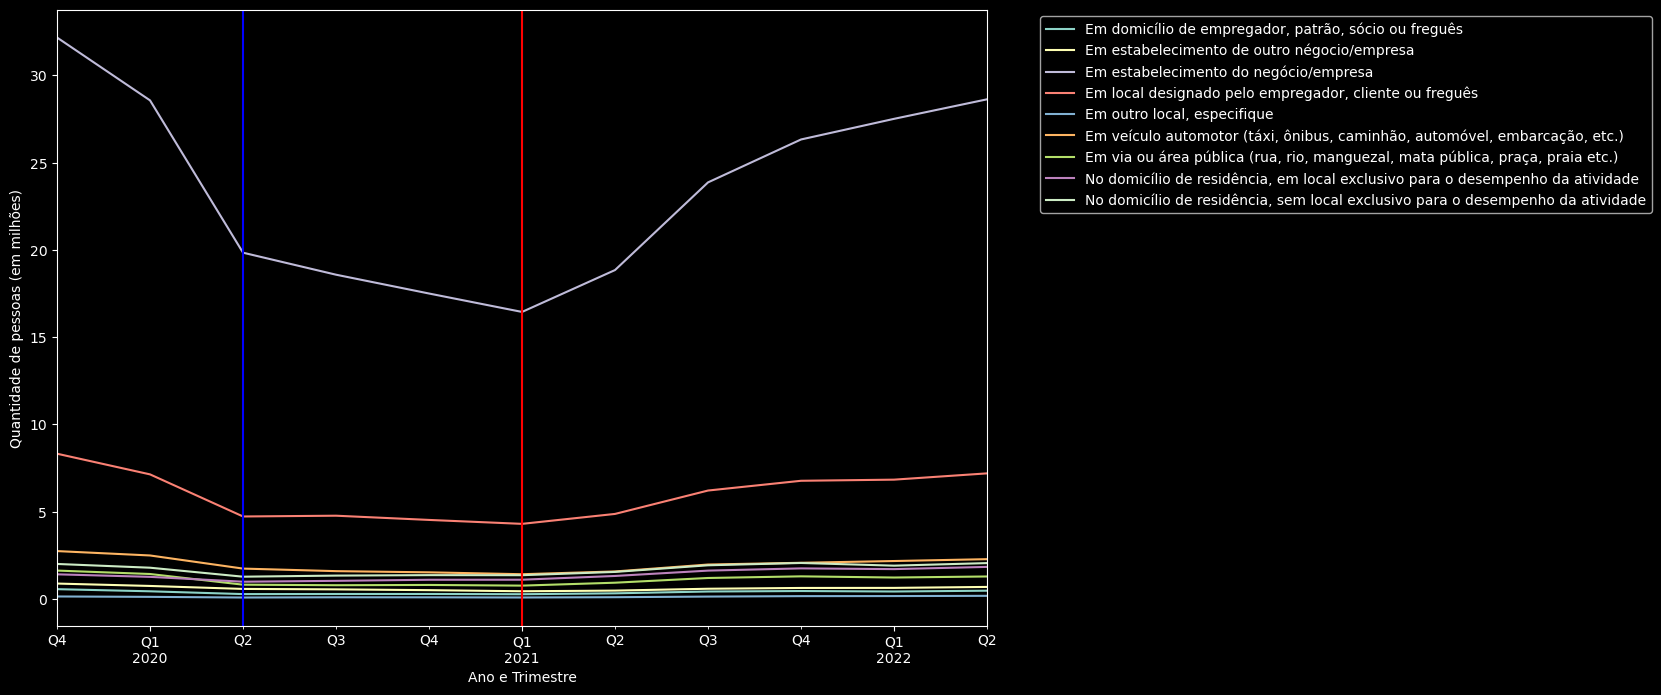

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
(local_trabalho_expandido/1000000).plot(ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 10})
plt.axvline(x = '2020Q2', color = 'b', label = 'Início do Lockdown no Brasil')
plt.axvline(x = '2021Q1', color = 'r', label = 'Início da vacinação no Brasil')
plt.xlabel('Ano e Trimestre')
plt.ylabel('Quantidade de pessoas (em milhões)')
plt.show()

In [ ]:
local_trabalho_sexo = pd.crosstab(index=pnadc_completa['ano_tri'],
                            columns=[pnadc_completa['V4022'], pnadc_completa['V2007']],
                            values=(pnadc_completa['V1029']*pnadc_completa['posest'])/pnadc_completa['V1029'],
                            aggfunc='sum')

local_trabalho_sexo

V4022   Em domicílio de empregador, patrão, sócio ou freguês            \
V2007                                                      0         1   
ano_tri                                                                  
2019Q4                                            335732.0    215433.0   
2020Q1                                            259659.0    169363.0   
2020Q2                                            157722.0    111317.0   
2020Q3                                            170006.0    104349.0   
2020Q4                                            171649.0    104503.0   
2021Q1                                            167224.0     94678.0   
2021Q2                                            193411.0    119968.0   
2021Q3                                            259125.0    157651.0   
2021Q4                                            290399.0    154547.0   
2022Q1                                            263579.0    153222.0   
2022Q2                                            302794.0    160568.0   

V4022   Em estabelecimento de outro négocio/empresa            \
V2007                                             0         1   
ano_tri                                                         
2019Q4                                     515398.0  356896.0   
2020Q1                                     444222.0  291399.0   
2020Q2                                     338183.0  227242.0   
2020Q3                                     322224.0  216797.0   
2020Q4                                     297080.0  197498.0   
2021Q1                                     255167.0  176317.0   
2021Q2                                     264640.0  204351.0   
2021Q3                                     338639.0  236901.0   
2021Q4                                     366581.0  254163.0   
2022Q1                                     358686.0  265661.0   
2022Q2                                     382433.0  297527.0   

V4022   Em estabelecimento do negócio/empresa              \
V2007                                       0           1   
ano_tri                                                     
2019Q4                             17357536.0  14807735.0   
2020Q1                             15500727.0  13062873.0   
2020Q2                             10828743.0   9005734.0   
2020Q3                             10273492.0   8299704.0   
2020Q4                              9651033.0   7843768.0   
2021Q1                              9082586.0   7356494.0   
2021Q2                             10356455.0   8482619.0   
2021Q3                             13081380.0  10781918.0   
2021Q4                             14288231.0  12034467.0   
2022Q1                             14884715.0  12620085.0   
2022Q2                             15398959.0  13225268.0   

V4022   Em local designado pelo empregador, cliente ou freguês             \
V2007                                                        0          1   
ano_tri                                                                     
2019Q4                                           6995626.0      1318649.0   
2020Q1                                           6045708.0      1083912.0   
2020Q2                                           4009294.0       707780.0   
2020Q3                                           4091970.0       669241.0   
2020Q4                                           3859096.0       660243.0   
2021Q1                                           3691262.0       602736.0   
2021Q2                                           4196358.0       666982.0   
2021Q3                                           5380774.0       823074.0   
2021Q4                                           5849915.0       912884.0   
2022Q1                                           5898200.0       929264.0   
2022Q2                                           6204344.0       982967.0   

V4022   Em outro local, especifique           \
V2007                             0        1   
ano_tri               

In [ ]:
#TODO: Criar uma gráfico 3x3 parar mostrar o comportamento da variável 'V2007' dentro da variável 'V4022' por trimestre

In [ ]:
categorias_local = pnadc_completa['V4022'].dropna().unique()
categorias_local
categorias_plot = pd.DataFrame({'V4022': categorias_local, 'coluna':[0,0,0,1,1,1,2,2,2], 'linha':[0,1,2,0,1,2,0,1,2]})

In [ ]:
categorias_plot

,V4022,coluna,linha
0,Em estabelecimento do negócio/empresa,0,0
1,"Em domicílio de empregador, patrão, sócio ou f...",0,1
2,"Em via ou área pública (rua, rio, manguezal, m...",0,2
3,"Em local designado pelo empregador, cliente ou...",1,0
4,"No domicílio de residência, sem local exclusiv...",1,1
5,"Em veículo automotor (táxi, ônibus, caminhão, ...",1,2
6,Em estabelecimento de outro négocio/empresa,2,0
7,"No domicílio de residência, em local exclusivo...",2,1
8,"Em outro local, especifique",2,2


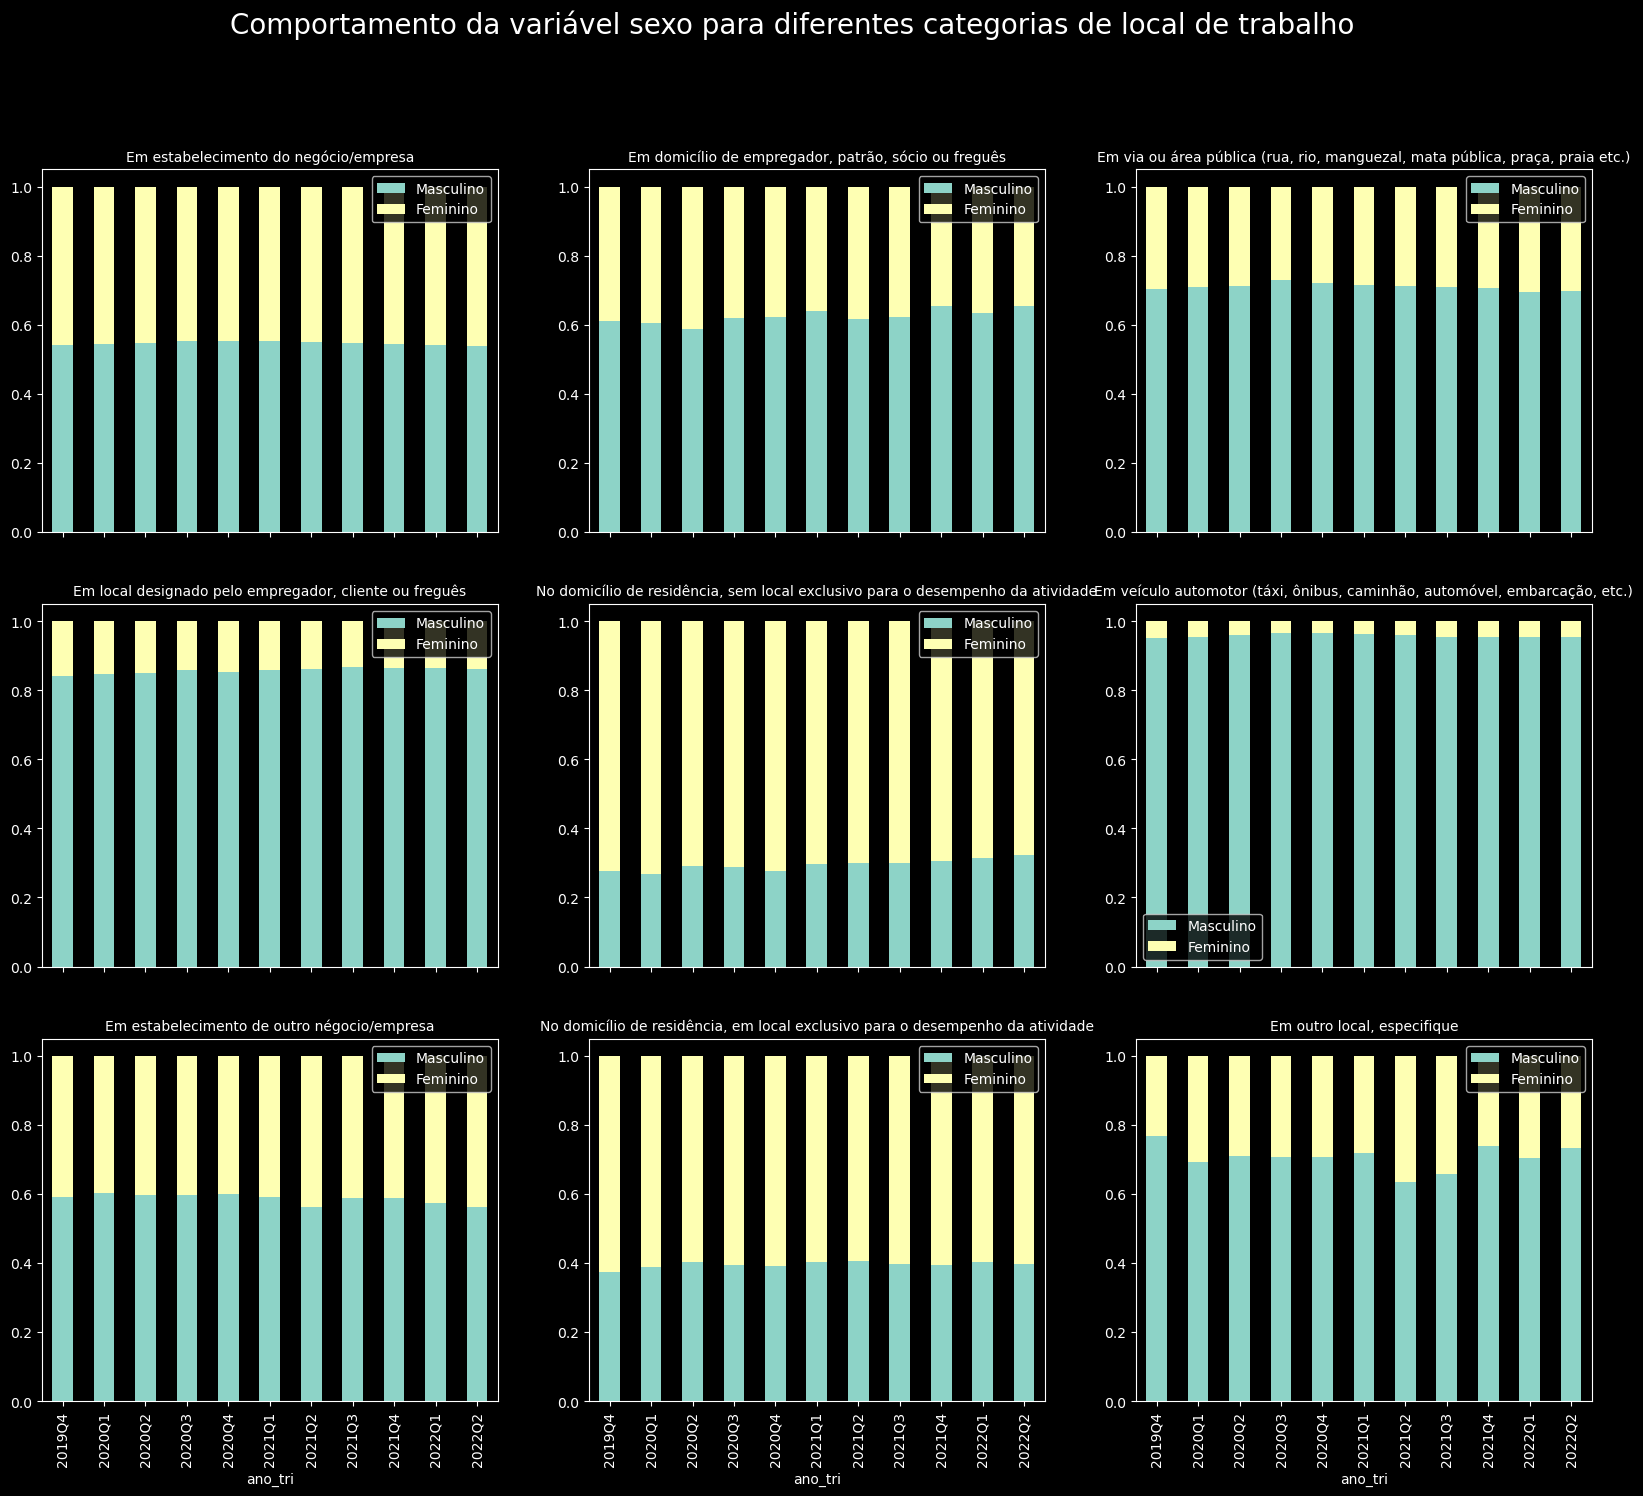

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 16), sharex=True)

fig.suptitle('Comportamento da variável sexo para diferentes categorias de local de trabalho', size=20) #Título para a figura toda
for i in range(0, 9):

    local_trabalho_sexo = pd.crosstab(index=pnadc_completa.where(pnadc_completa['V4022']==categorias_plot['V4022'][i])['ano_tri'],
                            columns=[pnadc_completa.where(pnadc_completa['V4022']==categorias_plot['V4022'][i])['V4022'], 
                                        pnadc_completa.where(pnadc_completa['V4022']==categorias_plot['V4022'][i])['V2007']],
                            values=(pnadc_completa.where(pnadc_completa['V4022']==categorias_plot['V4022'][i])['V1029'] * \
                                        pnadc_completa.where(pnadc_completa['V4022']==categorias_plot['V4022'][i])['posest']) / \
                                        pnadc_completa.where(pnadc_completa['V4022']==categorias_plot['V4022'][i])['V1029'],
                            aggfunc='sum',
                            normalize='index')
                            
    local_trabalho_sexo.columns = ['Masculino', 'Feminino']

    (local_trabalho_sexo).plot(ax=axes[categorias_plot['coluna'][i],categorias_plot['linha'][i]], kind='bar', stacked=True, title=categorias_plot['V4022'][i])
    axes[categorias_plot['coluna'][i],categorias_plot['linha'][i]].set_title(categorias_plot['V4022'][i], size=10)
    #axes[categorias_plot['coluna'][i],categorias_plot['linha'][i]].set_xticklabels(fontsize=12, rotation=45)
    #axes[categorias_plot['coluna'][i],categorias_plot['linha'][i]].set_xlabel('Ano e Trimestre', size=12)
    #axes[categorias_plot['coluna'][i],categorias_plot['linha'][i]].set_ylabel('Quantidade de Pessoas (Milhões)', size=12)

plt.show()

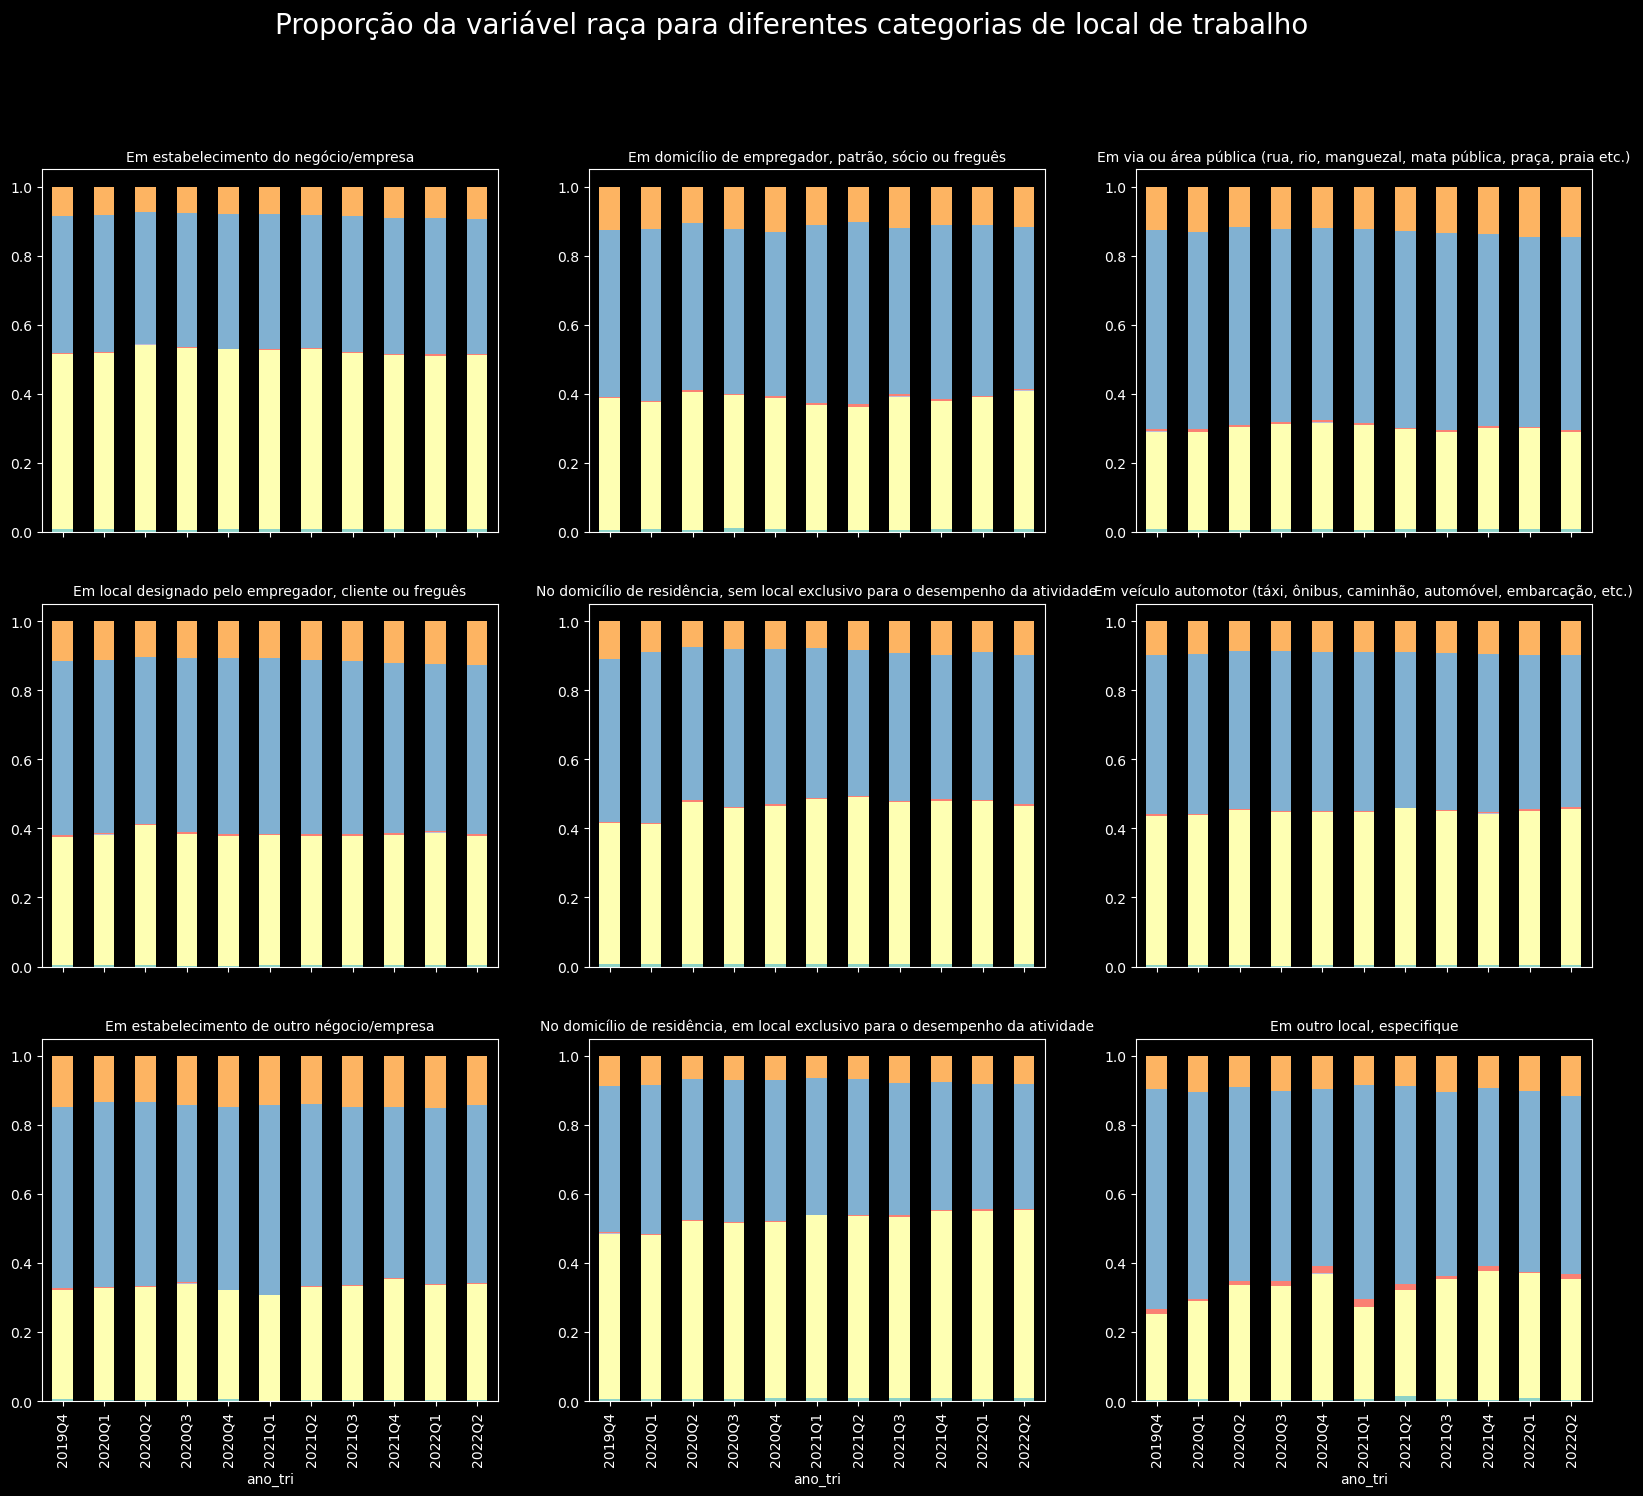

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 16), sharex=True)

fig.suptitle('Proporção da variável raça para diferentes categorias de local de trabalho', size=20) #Título para a figura toda
for i in range(0, 9):

    local_trabalho_raca = pd.crosstab(index=pnadc_completa.where(pnadc_completa['V4022']==categorias_plot['V4022'][i])['ano_tri'],
                            columns=[pnadc_completa.where(pnadc_completa['V4022']==categorias_plot['V4022'][i])['V4022'], 
                                        pnadc_completa.where(pnadc_completa['V4022']==categorias_plot['V4022'][i])['V2010']],
                            values=(pnadc_completa.where(pnadc_completa['V4022']==categorias_plot['V4022'][i])['V1029'] * \
                                        pnadc_completa.where(pnadc_completa['V4022']==categorias_plot['V4022'][i])['posest']) / \
                                        pnadc_completa.where(pnadc_completa['V4022']==categorias_plot['V4022'][i])['V1029'],
                            aggfunc='sum',
                            normalize='index')
                            
    #local_trabalho_sexo.columns = ['Masculino', 'Feminino']

    (local_trabalho_raca).plot(ax=axes[categorias_plot['coluna'][i],categorias_plot['linha'][i]], kind='bar', stacked=True, title=categorias_plot['V4022'][i], legend=None)
    axes[categorias_plot['coluna'][i],categorias_plot['linha'][i]].set_title(categorias_plot['V4022'][i], size=10)
    
plt.show()

#TODO: Inserir somente uma legenda entre o título e os gráficos para identificar as cores, sem aparecer o nome do local de trabalho.

In [ ]:
#Função para estimar média agrupada por alguma coluna

def weighted_average(df,data_col,weight_col,by_col):
    df['_data_times_weight'] = df[data_col]*df[weight_col]
    df['_weight_where_notnull'] = df[weight_col]*pd.notnull(df[data_col])
    g = df.groupby(by_col)
    result = g['_data_times_weight'].sum() / g['_weight_where_notnull'].sum()
    del df['_data_times_weight'], df['_weight_where_notnull']
    return result

#### Análise da variação do local de trabalho ao longo do tempo através dos indivíduos em trimestres consecutivos

> A Pnad Contínua não permite que o acompanhamento das mesmas pessoas, ou seja, dos mesmos indivíduos seja feito de forma direta. Em primeiro lugar, porque a pesquisa investiga os mesmos domicílios de forma recorrente, mas nada garante que os indivíduos investigados pela primeira entrevista em determinado domicílio sejam encontrados residindo no mesmo domicílio nas próximas quatro entrevistas (perda por não resposta). 

> Em segundo lugar, não há uma maneira direta de acompanhar as mesmas pessoas entre um trimestre e outro, porque o IBGE fornece apenas a chave de identificação dos domicílios, mas não divulga a chave de identificação dos moradores dentro de cada domicílio.

> Para resolver o primeiro problema, de perda por não resposta, optou-se por utilizar somente as informações de trimestres consecutivos, ao invés de acompanhar um período mais longo

> Para resolver o segundo problema, isto é, o da falta de uma chave de identificação individual para os moradores dos domicílios investigados, utilizar-se-á a estratégia de combinar as informações de moradia, sexo e data de nascimento dos moradores.

In [ ]:
#TODO: Criar base que dentifique , em trimestres consecutivos para cada ano, a mudança de local de trabalho para os indivíduos

"...devem ser calculados novos pesos para as pessoas investigadas
que permaneçam na subamostra de dados longitudinais, de forma a compensar as
perdas ocorridas em relação à amostra original, conforme apresentadas na seção
anterior. Os pesos de expansão dessa subamostra consideram os respondentes no
primeiro trimestre e devem ser ajustados de acordo com as perdas, devido a
problemas de identificação entre um trimestre e outro e devido a não resposta no
segundo trimestre."

O cálculo dos novos pesos é feito em duas etapas:
1. A primeira etapa ajusta os pesos de forma a compensar as perdas em relação
à amostra original, apresentadas no Quadro 1;
2. Na segunda etapa, os pesos da subamostra devem ser ajustados para que as
estimativas da população da subamostra, por sexo e faixa etária,
correspondam às estimativas, por sexo e faixa etária, obtidas para a amostra
original da Pnad Contínua, em cada um dos 77 domínios de estimação
(variável posest).

In [ ]:
#TODO: Calcular novos pesos e expandir as observações da análise anterior

In [ ]:
#TODO: Criar Visualização para a amostra criada.